In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages')

In [159]:
#Import datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [274]:
df_test_or = pd.read_csv('test.csv')

In [160]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [161]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


## Exploratory Data Analysis & Data Prep

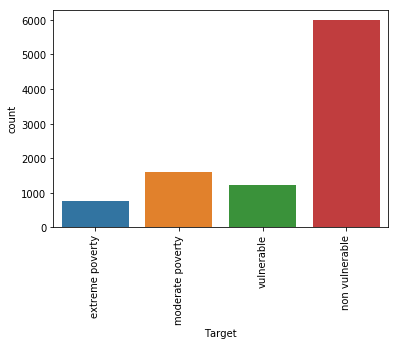

In [163]:
#Exploring the distribution of the target variable
sns.countplot(x='Target', data = df_train)
labels = ['extreme poverty','moderate poverty','vulnerable','non vulnerable']
plt.xticks(ticks = [0,1,2,3], labels = labels, rotation = 'vertical');

#Unequal distribution of target classes, to be address by balancing class weights in the models used eventually

In [164]:
#Exploring data stored as object type
objects = df_train.select_dtypes('object')
objects.head(15)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
5,ID_ec05b1a7b,2b58d945f,yes,11,no
6,ID_e9e0c1100,2b58d945f,yes,11,no
7,ID_3e04e571e,d6dae86b7,yes,9,no
8,ID_1284f8aad,d6dae86b7,yes,9,no
9,ID_51f52fdd2,d6dae86b7,yes,9,no


Two of the features are IDs. 

Dependency is the ratio of number of dependents to the number of individuals in the working age group and is calculated. 

edjefe is the years of education of male head of household

edjefa is the years of education of female head of household

edjefe and edjefa are present for different observations depending on whether the head of household is male or female. 

In these columns yes is replacing the value 1, and no is replacing the value 0. We replace these values back.


In [165]:
#Check if dependency value is really corresponding to 0 and 1
df_train['check'] = (df_train['hogar_nin'] + df_train['hogar_mayor'])/(df_train['hogar_total'] - (df_train['hogar_nin'] + df_train['hogar_mayor']))
df_train.loc[:,['Id', 'check', 'dependency']]

#Yes it is, replace values
df_train.drop('check', axis = 1, inplace = True)

df_train['dependency'].replace({'yes': 1, 'no': 0}, inplace = True)

#Replace nos
df_train['edjefe'].replace({'no': 0}, inplace = True)
df_train['edjefa'].replace({'no': 0}, inplace = True)

#Replace years of education for heads of household, with the figure on education
df_train.loc[(df_train['edjefa'] == "yes"), "edjefa"] = df_train.loc[(df_train['edjefa'] == "yes"), "escolari"]
df_train.loc[(df_train['edjefe'] == "yes"), "edjefe"] = df_train.loc[(df_train['edjefe'] == "yes"), "escolari"]

#Change object type to float
df_train['dependency'] = df_train['dependency'].astype('float64')
df_train['edjefe'] = df_train['edjefe'].astype('float64')
df_train['edjefa'] = df_train['edjefa'].astype('float64')

#Create one feature for education of head of household
a = df_train[['edjefa','edjefe']]
df_train['edjef'] = a.max(axis=1) 


In [166]:
### REPEAT FOR TEST DATA ###

#Replace dependency values
df_test['dependency'].replace({'yes': 1, 'no': 0}, inplace = True)

#Replace nos
df_test['edjefe'].replace({'no': 0}, inplace = True)
df_test['edjefa'].replace({'no': 0}, inplace = True)

#Replace years of education for all, with the figure on years of schooling
df_test.loc[(df_test['edjefa'] == "yes"), "edjefa"] = df_test.loc[(df_test['edjefa'] == "yes"), "escolari"]
df_test.loc[(df_test['edjefe'] == "yes") , "edjefe"] = df_test.loc[(df_test['edjefe'] == "yes"), "escolari"]

df_test['dependency'] = df_test['dependency'].astype('float64')
df_test['edjefe'] = df_test['edjefe'].astype('float64')
df_test['edjefa'] = df_test['edjefa'].astype('float64')

#Create one feature for education of head of household
df_test['edjef'] = np.max(df_test[['edjefa','edjefe']], axis=1)


In [167]:
#If household has no water, assume no access to toilet
df_train.loc[(df_train.v14a ==  1) & (df_train.sanitario1 ==  1) & (df_train.abastaguano == 0), "v14a"] = 0
df_train.loc[(df_train.v14a ==  1) & (df_train.sanitario1 ==  1) & (df_train.abastaguano == 0), "sanitario1"] = 0

In [168]:
#If household has no water, assume no access to toilet
df_test.loc[(df_test.v14a ==  1) & (df_test.sanitario1 ==  1) & (df_test.abastaguano == 0), "v14a"] = 0
df_test.loc[(df_test.v14a ==  1) & (df_test.sanitario1 ==  1) & (df_test.abastaguano == 0), "sanitario1"] = 0

In [169]:
#Check for successful replacement
df_train.loc[:,['Id', 'dependency', 'edjefe', 'edjefa']].head()

,Id,dependency,edjefe,edjefa
0,ID_279628684,0.0,10.0,0.0
1,ID_f29eb3ddd,8.0,12.0,0.0
2,ID_68de51c94,8.0,0.0,11.0
3,ID_d671db89c,1.0,11.0,0.0
4,ID_d56d6f5f5,1.0,11.0,0.0


In [170]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 144 entries, Id to edjef
dtypes: float64(12), int64(130), object(2)
memory usage: 10.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 143 entries, Id to edjef
dtypes: float64(12), int64(129), object(2)
memory usage: 26.0+ MB


(None, None)

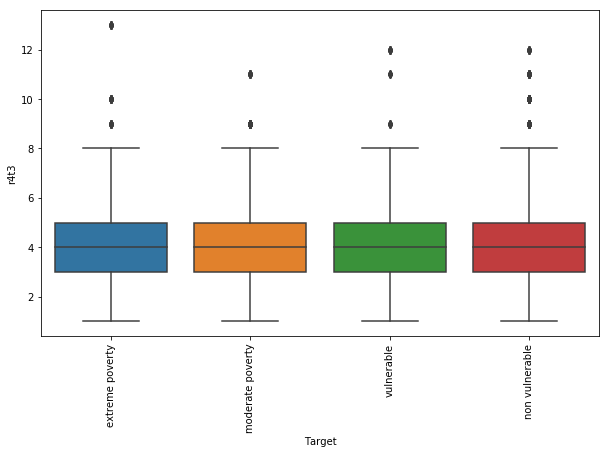

In [171]:
#Relationship btw number of people in the household, and the target
plt.figure(figsize=(10,6))
labels = ['extreme poverty','moderate poverty','vulnerable','non vulnerable']
sns.boxplot(x='Target', y ='r4t3', data = df_train)
locs, labels2 = plt.xticks()
plt.xticks(ticks = locs, labels = labels, rotation = 'vertical');
#No pattern


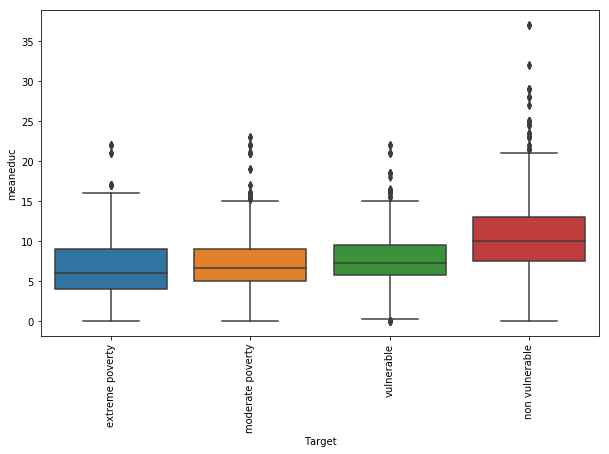

In [172]:
#Relationship btw average schooling of people in the household, and the target categories
plt.figure(figsize=(10,6))
labels = ['extreme poverty','moderate poverty','vulnerable','non vulnerable']
sns.boxplot(x='Target', y ='meaneduc', data = df_train)
locs, labels2 = plt.xticks()
plt.xticks(ticks = locs, labels = labels, rotation = 'vertical');
#More education seems linked to improved economic status


In [173]:
#Check for features where > 70% data missing
missing = df_train[[column for column in df_train if df_train[column].count()/len(df_train) <= 0.3]]
missing.head()
#These are Monthly rent payment(>70% missing), number of tablets a household owns (>70% missing), and years behind in school (>80% missing)



,v2a1,v18q1,rez_esc
0,190000.0,NaN,NaN
1,135000.0,1.0,NaN
2,NaN,NaN,NaN
3,180000.0,1.0,1.0
4,180000.0,1.0,NaN


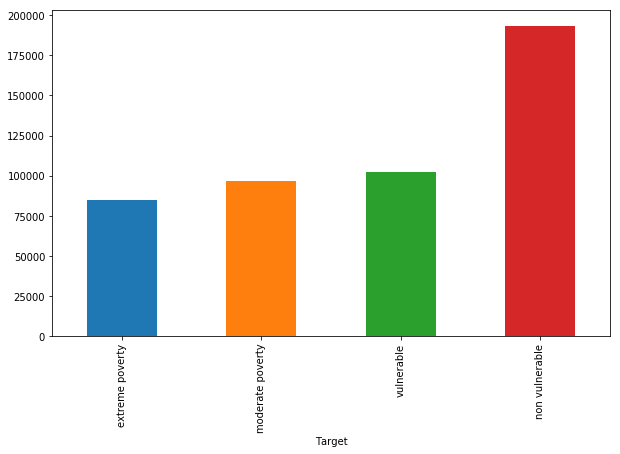

In [174]:
#Plotting monthly rent payment
plt.figure(figsize=(10,6))
df_train.groupby('Target')['v2a1'].mean().plot('bar')
labels = ['extreme poverty','moderate poverty','vulnerable','non vulnerable']
plt.xticks(ticks = [0,1,2,3], labels = labels, rotation = 'vertical')

#Since several households are not on rent, two options - use value 0 or impute values. 0 may skew relationship btw rent and target
#Try both methods - first taking value 0 for those not on rent - who own a house for sure
df_train.loc[((df_train.tipovivi1 == 1) & df_train['v2a1'].isnull()), 'v2a1'] = 0


In [175]:
#Replacing rent values in test data
df_test.loc[((df_test.tipovivi1 == 1) & df_test['v2a1'].isnull()), 'v2a1'] = 0

In [176]:
#Fill 0 for Nan values in case of number of tablets owned by those who do not own a tablet and drop years behind in school
df_train[df_train['v18q'] == 0]['v18q1']
df_train.loc[((df_train['v18q'] == 0) & df_train['v18q1'].isnull()), 'v18q1'] = 0
df_train.loc[(((df_train['age'] > 19) | (df_train['age'] < 7)) & df_train['rez_esc'].isnull()), 'rez_esc'] = 0
df_train.loc[:,['meaneduc', 'rez_esc']].corr()


,meaneduc,rez_esc
meaneduc,1.00000,-0.09102
rez_esc,-0.09102,1.00000


In [177]:
df_train['rez_esc']

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      1.0
11      NaN
12      0.0
13      0.0
14      0.0
15      NaN
16      0.0
17      NaN
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
9527    0.0
9528    0.0
9529    0.0
9530    0.0
9531    0.0
9532    0.0
9533    0.0
9534    0.0
9535    0.0
9536    1.0
9537    0.0
9538    0.0
9539    0.0
9540    0.0
9541    0.0
9542    0.0
9543    0.0
9544    0.0
9545    0.0
9546    0.0
9547    0.0
9548    NaN
9549    0.0
9550    0.0
9551    0.0
9552    0.0
9553    0.0
9554    0.0
9555    0.0
9556    0.0
Name: rez_esc, Length: 9557, dtype: float64

In [178]:
#Replacing values in the test data
df_test.loc[((df_test['v18q'] == 0) & df_test['v18q1'].isnull()), 'v18q1'] = 0
df_test.loc[(((df_test['age'] > 19) | (df_test['age'] < 7)) & df_test['rez_esc'].isnull()), 'rez_esc'] = 0

In [179]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjef
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,10.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,12.0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,11.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,11.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,11.0


In [180]:
#Creating household level data - creating household level features for each individual,
#and then subsetting data to only include heads of households

#Household level per capita features
df_train['tabs_per_cap'] = df_train['v18q1']/df_train['tamviv']
df_train['bedrooms_per_cap'] = df_train['bedrooms']/df_train['tamviv']
df_train['rooms_per_cap'] = df_train['rooms']/df_train['tamviv']
df_train['mobiles_per_cap'] = df_train['qmobilephone']/df_train['tamviv']
df_train['rent_per_cap'] = df_train['v2a1']/df_train['tamviv']

# No toilet, no electricity, no floor, no water service, no kitchen
df_train['risk'] = (df_train['sanitario1'] + 
                         df_train['noelec'] + 
                         df_train['pisonotiene'] + 
                         df_train['abastaguano'] + 
                         df_train['energcocinar1'])

#Poorly constructed/unsafe home - walls, roof, floor quality all bad
df_train['poor_construction'] = (df_train['epared1'] + 
                         df_train['etecho1'] + 
                         df_train['eviv1'])

#Tech score - presence of tv, computer, phone, tablet, refrigerator - 1 point for each
df_train['tech_score'] = (df_train['computer'] + 
                         df_train['television'] + 
                         df_train['mobilephone'] +
                         df_train['v18q'] +
                         df_train['refrig'])

#Number of disabled persons in a household
sum_disabled = pd.DataFrame(df_train.groupby("idhogar")["dis"].sum().reset_index(name='disabled_count'))
sum_disabled.columns
df_train = pd.merge(df_train, sum_disabled[['idhogar', 'disabled_count']], on= 'idhogar')

#Number of widowed members in the household - death more likely in poorer families?
sum_widowed = pd.DataFrame(df_train.groupby("idhogar")["estadocivil6"].sum().reset_index(name='widowed_count'))
sum_widowed.columns
df_train = pd.merge(df_train, sum_widowed[['idhogar', 'widowed_count']], on= 'idhogar')


In [181]:
#Recreating features in test set
#Creating household level data - creating household level features for each individual,
#and then subsetting data to only include heads of households

#Household level per capita features
df_test['tabs_per_cap'] = df_test['v18q1']/df_test['tamviv']
df_test['bedrooms_per_cap'] = df_test['bedrooms']/df_test['tamviv']
df_test['rooms_per_cap'] = df_test['rooms']/df_test['tamviv']
df_test['mobiles_per_cap'] = df_test['qmobilephone']/df_test['tamviv']
df_test['rent_per_cap'] = df_test['v2a1']/df_test['tamviv']

# No toilet, no electricity, no floor, no water service, no kitchen
df_test['risk'] = (df_test['sanitario1'] + 
                         df_test['noelec'] + 
                         df_test['pisonotiene'] + 
                         df_test['abastaguano'] + 
                         df_test['energcocinar1'])

#Poorly constructed/unsafe home - walls, roof, floor quality all bad
df_test['poor_construction'] = (df_test['epared1'] + 
                         df_test['etecho1'] + 
                         df_test['eviv1'])

#Tech score - presence of tv, computer, phone, tablet, refrigerator - 1 point for each
df_test['tech_score'] = (df_test['computer'] + 
                         df_test['television'] + 
                         df_test['mobilephone'] +
                         df_test['v18q'] +
                         df_test['refrig'])

#Number of disabled persons in a household
sum_disabled = pd.DataFrame(df_test.groupby("idhogar")["dis"].sum().reset_index(name='disabled_count'))
sum_disabled.columns
df_test = pd.merge(df_test, sum_disabled[['idhogar', 'disabled_count']], on= 'idhogar')

#Number of widowed members in the household - death more likely in poorer families?
sum_widowed = pd.DataFrame(df_test.groupby("idhogar")["estadocivil6"].sum().reset_index(name='widowed_count'))
sum_widowed.columns
df_test = pd.merge(df_test, sum_widowed[['idhogar', 'widowed_count']], on= 'idhogar')


In [182]:
#Impute missing values for the rest of the data if any
df_train.interpolate(inplace=True)
#Impute missing data in the test set
df_test.interpolate(inplace=True)

In [183]:
heads_train = df_train.loc[df_train['parentesco1'] == 1,]
heads_train.head()



,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,tabs_per_cap,bedrooms_per_cap,rooms_per_cap,mobiles_per_cap,rent_per_cap,risk,poor_construction,tech_score,disabled_count,widowed_count
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,0.00,1.00,3.00,1.00,190000.0,0,2,2,0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,1.00,1.00,4.00,1.00,135000.0,0,0,3,0,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,0.00,2.00,8.00,0.00,0.0,0,0,1,1,1
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,0.25,0.75,1.25,0.75,45000.0,0,0,3,0,0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,...,0.00,0.25,0.50,0.25,32500.0,0,2,2,0,0


In [184]:
null_columns=heads_train.columns[heads_train.isnull().any()]
heads_train[null_columns].isnull().sum()
heads_train[['rez_esc', 'age']]

,rez_esc,age
0,0.0,43
1,0.0,67
2,0.0,92
5,0.0,38
8,0.0,30
12,0.0,34
13,0.0,79
18,0.0,50
20,0.0,26
21,0.0,69


## Model Training and Testing

In [185]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in heads_train.columns:
    if heads_train[column_name].dtype == object:
        heads_train[column_name] = le.fit_transform(heads_train[column_name])
    else:
        pass

In [186]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df_test.columns:
    if df_test[column_name].dtype == object:
        df_test[column_name] = le.fit_transform(df_test[column_name])
    else:
        pass

In [187]:
heads_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 9552
Columns: 154 entries, Id to widowed_count
dtypes: float64(17), int64(137)
memory usage: 3.5 MB


In [188]:
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics


In [207]:
y = heads_train['Target'].values
X = heads_train.drop(labels = ['Target', 'idhogar'], axis = 1).values

In [208]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 11 )


In [209]:
X_train.shape

(2081, 152)

In [210]:
X_test.shape

(892, 152)

In [211]:
y_train.shape

(2081,)

In [212]:
y_test.shape

(892,)

In [213]:
col_names = df_train.drop(labels = ['Target', 'idhogar'], axis = 1).columns

### Decision Tree Classifier

In [225]:
indiv_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state= 7, class_weight= 'balanced')
indiv_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

In [226]:
pred = indiv_tree.predict(X_test)
indiv_tree.score(X_train,y_train)
indiv_tree.score(X_test,y_test)

0.4786995515695067

In [227]:
from sklearn.metrics import f1_score
score = f1_score(y_test, pred, average = 'macro')
score


0.31732675305768965

#### Using cross validation to find appropriate hyperparameters

In [228]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [229]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(indiv_tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [230]:
tree_grid.best_params_

{'max_depth': 2, 'max_features': 12}

In [231]:
tree_grid.best_score_

0.5881787602114368

In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree_grid.predict(X_test))

0.5852017937219731

Improvement in performance of our decision tree by changing model hyperparams

In [233]:
indiv_tree2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, max_features=12, random_state= 7, class_weight= 'balanced')
indiv_tree2.fit(X_train, y_train)
pred2 = indiv_tree2.predict(X_test)
indiv_tree2.score(X_train,y_train)
indiv_tree2.score(X_test,y_test)
score2 = f1_score(y_test, pred2, average = 'macro')
score2

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2817045867912712

In [234]:
#Checking for overfitting
indiv_tree2.score(X_train,y_train), indiv_tree2.score(X_test,y_test)

(0.5881787602114368, 0.5852017937219731)

In [235]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
tree_graph_to_png(tree=indiv_tree2, feature_names=col_names, png_file_to_save='decisiontree1.png')

### Random Forest Classifier

In [236]:
from sklearn import ensemble

In [237]:
rf = ensemble.RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 10, random_state = 7, class_weight= 'balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [238]:
rf_pred = rf.predict(X_test)
rf.score(X_train, y_train) 
rf.score(X_test, y_test)

0.6266816143497758

In [239]:
rf_score = f1_score(y_test, rf_pred, average = 'macro')
rf_score

0.3925530647541115

#### Using cross-validation to find ideal hyperparams

In [240]:
rf_params = {'max_depth': range(6,18),
               'max_features': range(4,19)}

rf_grid = GridSearchCV(rf, rf_params,
                         cv=8, n_jobs=-1, verbose=True)

rf_grid.fit(X_train, y_train)

Fitting 8 folds for each of 180 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 23.0min finished


GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(6, 18), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [241]:
rf_grid.best_params_#{'max_depth': 10, 'max_features': 16}

{'max_depth': 14, 'max_features': 14}

In [242]:
rf_grid.best_score_

0.6900528592023066

In [243]:
rf2 = ensemble.RandomForestClassifier(n_estimators = 500, criterion = 'entropy', max_depth = 14, max_features = 14, random_state = 7, class_weight= 'balanced')
rf2.fit(X_train, y_train)
rf_pred2 = rf2.predict(X_test)
rf2.score(X_train,y_train)
rf2.score(X_test,y_test)
rf_score2 = f1_score(y_test, rf_pred2, average = 'macro')
rf_score2

0.3050905417250469

In [244]:
#Checking for performance on training and validation
rf2.score(X_train,y_train), rf2.score(X_test,y_test)

(1.0, 0.6457399103139013)

### XGBoost Classifier

In [245]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [246]:
xgb_mod = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 500, class_weight='balanced')

In [247]:
xgb_mod.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
       class_weight='balanced', colsample_bylevel=1, colsample_bytree=0.3,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [248]:
xgb_pred = xgb_mod.predict(X_test)

In [249]:
xgb_mod.score(X_train, y_train), xgb_mod.score(X_test, y_test)

(1.0, 0.6457399103139013)

In [250]:
accuracy_score(y_test, xgb_pred)

0.6457399103139013

In [251]:
#Macro f1 score
xgb_score = f1_score(y_test, xgb_pred, average = 'macro')
xgb_score

0.3411967221038378

### Creating Submission on Test data

In [275]:
submission = pd.DataFrame()
submission['Id'] = df_test_or['Id']
test_X = df_test.drop(labels = ['idhogar'], axis = 1).values

In [277]:
submission['Target'] = xgb_mod.predict(test_X)
submission.to_csv('submission.csv', index = False)